### [MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv](https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz/about_data)
Columns: 
- __month__: The month in which subway trains delayed is being calculated (yyyy-mm-dd).
- __division__: The A Division (numbered subway lines), B Division (lettered subway lines) and systemwide.
- __line__: Each subway line (1, 2, 3, 4, 5, 6, 7, A, C, E, B, D, F, M, G, J, Z, L, N, Q, R, W, S 42nd, S Rock, S Fkln).
- __day_type__: Represents weekday as 1 and weekend as 2.
- __reporting_category__: The six categories that delays are reported under: Infrastructure & equipment, Crew availability, Police & medical, External Factors, Operating conditions, Planned ROW work. 
- __subcategory__: The sub-categories that fall under the definition of Delays: Braking; Door-Related; Fire, Smoke, Debris; Inclement Weather; Crew Availability; Insufficient Supplement Schedule; Propulsion; Public Conduct, Crime, Police Response; Rail and Roadbed; Persons on Roadbed; Service Delivery; Sick/Injured Customer; Train Brake Activation - Cause Unknown; Subways Maintenance; Work Equipment; Capital Work - Other Planned ROW; External Debris on Roadbed; External Agency or Utility; Capital Work - Other Planned ROW; Other – CE; Other – Sig; Other Infrastructure; Other Internal Disruptions.
- __delays__: The number of train delays per category and time period.

# Data Analysis

# Global Variables

In [525]:
class ColorShapePair:
    def __init__(self, color, shape):
        self.color = color
        self.shape = shape

line_colors_shapes = {
    "1": ColorShapePair("red", "o"),
    "2": ColorShapePair("red", "s"),
    "3": ColorShapePair("red", "^"),
    "4": ColorShapePair("green", "o"),
    "5": ColorShapePair("green", "s"),
    "6": ColorShapePair("green", "^"),
    "7": ColorShapePair("purple", "o"),
    "A": ColorShapePair("blue", "o"),
    "C": ColorShapePair("blue", "s"),
    "E": ColorShapePair("blue", "^"),
    "B": ColorShapePair("orange", "o"),
    "D": ColorShapePair("orange", "s"),
    "F": ColorShapePair("orange", "^"),
    "M": ColorShapePair("orange", "*"),
    "G": ColorShapePair("lightgreen", "o"),
    "J": ColorShapePair("brown", "o"),
    "Z": ColorShapePair("brown", "s"),
    "JZ":ColorShapePair( "brown", "^"),
    "L": ColorShapePair("gray", "o"),
    "N": ColorShapePair("gold", "o"),
    "Q": ColorShapePair("gold", "s"),
    "R": ColorShapePair("gold", "^"),
    "W": ColorShapePair("gold", "*"),
    "S Fkln": ColorShapePair("lightgray", "o"),
    "S Rock": ColorShapePair("lightgray", "s"),
    "GS": ColorShapePair("lightgray", "^"),
}

category_colors = {
    "Braking": "red",
    "Capital Work - Other Planned ROW": "wheat",
    "Crew Availability": "orange",
    "Door-Related": "yellow",
    "External Agency or Utility": "gray",
    "External Debris on Roadbed": "aqua",
    "Fire, Smoke, Debris": "darkred",
    "Inclement Weather": "lightgray",
    "Insufficient Supplement Schedule": "skyblue",
    "Operating Conditions": "lightgreen",
    "Other - CE": "blue",
    "Other - Sig": "salmon",
    "Other Infrastructure": "teal",
    "Other Internal Disruptions": "violet",
    "Other Operating Environment": "green",
    "Other Planned ROW Work": "darkslategray",
    "Persons on Roadbed": "powderblue",
    "Propulsion": "purple",
    "Public Conduct, Crime, Police Response": "royalblue",
    "Rail and Roadbed": "sienna",
    "Service Delivery": "lime",
    "Service Management": "navy",
    "Sick/Injured Customer": "pink",
    "Signal Modernization Capital Project": "gold",
    "Subways Maintenance": "olive",
    "Train Brake Activation - Cause Unknown": "crimson",
    "Work Equipment": "steelblue",
    "Other (< 0.5%)": "azure", #custom category in the pie chart
}

figure_num = 3
def get_figure_label():
    global figure_num
    figure_num += 1
    return "Figure " + str(figure_num - 1)

# Load and clean the data

In [526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

delays_file = "MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv"
df = pd.read_csv(delays_file)

# replace missing subcategories with reporting_category
df['subcategory'] = df['subcategory'].fillna(df['reporting_category'])

# replace "Other Operating Environment" with "Operating Conditions" to maintain parity
# a new "Service Management" subcategory was added in Aug 2024 which
# replaces the empty subcategory for "Operating Conditions"
df['subcategory'] = df['subcategory'].replace("Other Operating Environment", "Operating Conditions")

# drop the reporting_category
df = df.drop(columns=['division', 'reporting_category'])

# remove S Rock, S Fkln, and GS (shuttles)
df = df[~df['line'].isin(['S Rock', 'S Fkln', 'GS'])]

df

,month,line,day_type,subcategory,delays
0,2024-10-01,1,1,Crew Availability,60
1,2024-10-01,1,1,External Debris on Roadbed,17
2,2024-10-01,1,1,Braking,20
3,2024-10-01,1,1,Door-Related,43
4,2024-10-01,1,1,"Fire, Smoke, Debris",30
...,...,...,...,...,...
39025,2020-01-01,R,2,Subways Maintenance,23
39026,2020-01-01,R,2,Work Equipment,3
39027,2020-01-01,R,2,Persons on Roadbed,4
39028,2020-01-01,R,2,"Public Conduct, Crime, Police Response",31


In [527]:
# group by delay category
subcategory_df = df.groupby('subcategory').sum().reset_index()

# group less than 0.5% of delays into 'Small Delays'
threshold = 0.5 / 100
subcategory_df.loc[subcategory_df['delays'] / subcategory_df['delays'].sum() < threshold, 'subcategory'] = 'Other (< 0.5%)'
subcategory_df = subcategory_df.groupby('subcategory').sum().reset_index()

#sort by delays
subcategory_df = subcategory_df.sort_values('delays', ascending=False)

subcategory_df


,subcategory,month,line,day_type,delays
2,Crew Availability,2024-10-012024-10-012024-10-012024-10-012024-1...,1122334456677AABCCDDEEFFGGJZJZLLMMNNQQRR112234...,3312,338424
8,Operating Conditions,2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGGJZJZLMNNQQRR1122334...,3259,308150
21,Subways Maintenance,2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGGJZJZLLMMNNQQRR11223...,3284,308141
16,"Public Conduct, Crime, Police Response",2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGGJZJZLLMMNNQQRR11223...,3335,241166
11,Other - Sig,2024-10-012024-10-012024-10-012024-10-012024-1...,1122334455677AABCCDDEEFFGGJZJZLLMMNNQQRR112233...,3225,195327
14,Persons on Roadbed,2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGJZLLMNNQQRR112233445...,2812,85476
17,Rail and Roadbed,2024-10-012024-10-012024-10-012024-10-012024-1...,123445567ABCDDEEFFGJZJZLMMNNQR11223445667AABCC...,2587,73795
19,Sick/Injured Customer,2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGJZLMNNQQRR1223344556...,3054,61360
1,Capital Work - Other Planned ROW,2024-10-012024-10-012024-10-012024-10-012024-1...,1122344556677AABCCDDEFFGJZLMNNQRR1122334556677...,2090,47632
18,Service Delivery,2024-10-012024-10-012024-10-012024-10-012024-1...,1122334456677AABCCDDEEFFGGJZJZLLMNNQQRR1122334...,3021,39348


Text(0.5, 1.0, 'Figure 3: Reason for Delays Since 2020')

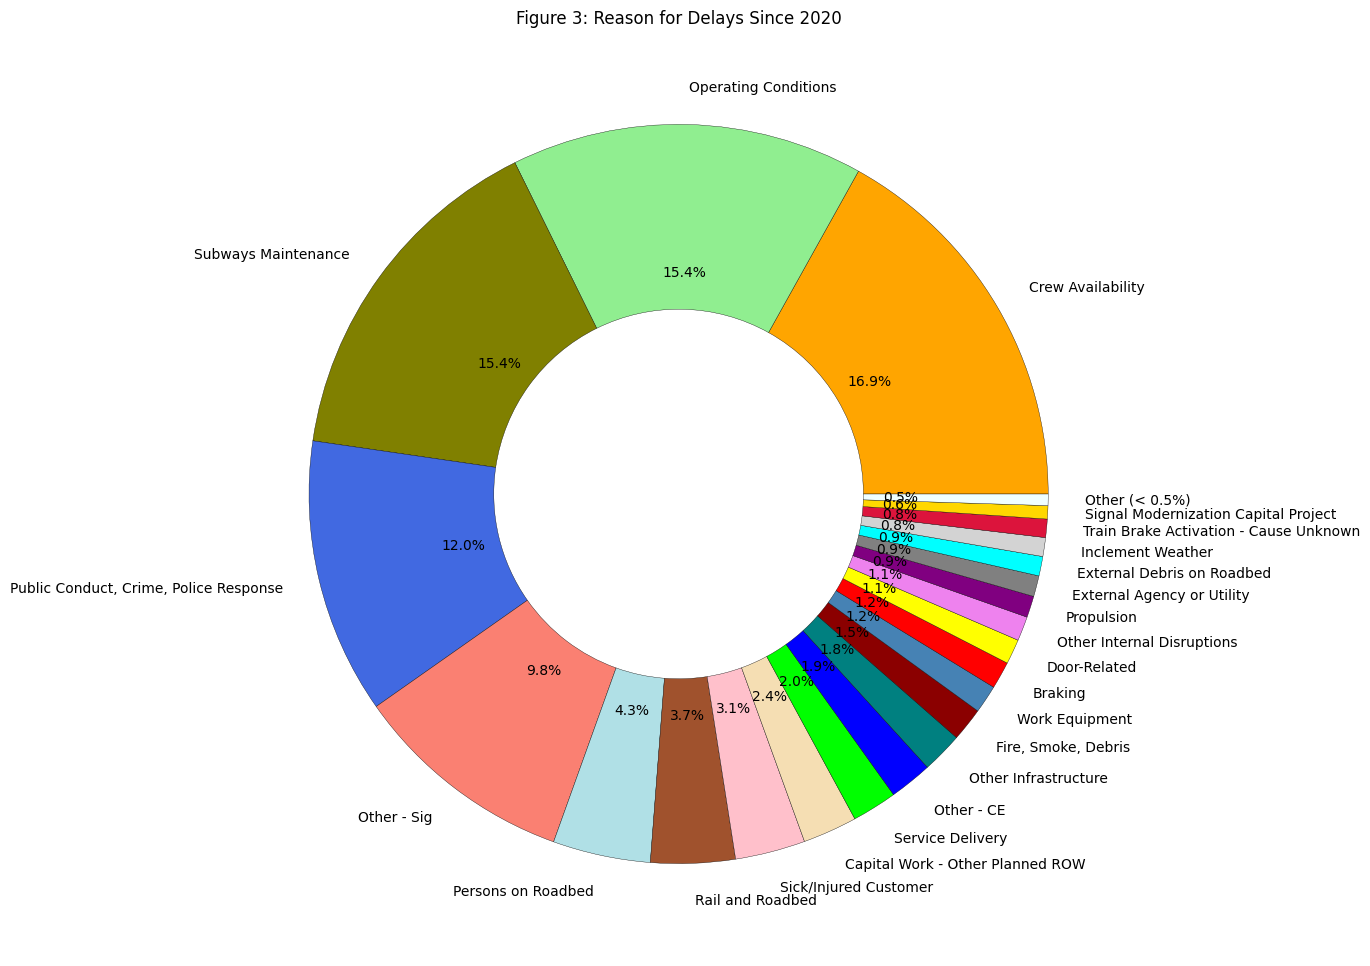

In [528]:
# create a donut chart
fig, ax = plt.subplots(figsize=(12, 12))

ax.pie(
    subcategory_df['delays'],
    labels=subcategory_df['subcategory'],
    autopct='%1.1f%%',
    colors=[category_colors[col] for col in subcategory_df['subcategory']],
    wedgeprops={"edgecolor": "black", "linewidth": 0.25, "antialiased": True, "width": 0.5},
)

plt.title(get_figure_label() + ": Reason for Delays Since 2020")


In [529]:
# pivot the delay subcategory rows into columns
line_grouped = df.copy()
line_grouped = line_grouped.pivot(index=['month', 'day_type', 'line'], columns='subcategory', values='delays').fillna(0)
line_grouped['total_delays'] = line_grouped.sum(axis=1)

# sum the delays
line_grouped = line_grouped.groupby(['line']).sum().reset_index()

# sort by delays
line_grouped = line_grouped.sort_values('total_delays', ascending=False)
line_grouped.set_index('line', inplace=True)

#drop total_delays now
line_grouped = line_grouped.drop(columns=['total_delays'])

line_grouped


subcategory,Braking,Capital Work - Other Planned ROW,Crew Availability,Door-Related,External Agency or Utility,External Debris on Roadbed,"Fire, Smoke, Debris",Inclement Weather,Insufficient Supplement Schedule,Operating Conditions,...,Propulsion,"Public Conduct, Crime, Police Response",Rail and Roadbed,Service Delivery,Service Management,Sick/Injured Customer,Signal Modernization Capital Project,Subways Maintenance,Train Brake Activation - Cause Unknown,Work Equipment
line,,,,,,,,,,,,,,,,,,,,,
N,2684.0,3050.0,28351.0,3266.0,424.0,1806.0,2408.0,2380.0,1067.0,24770.0,...,2686.0,18933.0,6465.0,2838.0,0.0,2779.0,191.0,30455.0,1222.0,3087.0
A,1526.0,4196.0,28175.0,1874.0,8238.0,815.0,1933.0,1028.0,317.0,26427.0,...,1913.0,14853.0,4624.0,3177.0,0.0,3601.0,48.0,32163.0,930.0,1250.0
F,968.0,7123.0,24154.0,480.0,1197.0,542.0,1699.0,614.0,444.0,16247.0,...,683.0,12063.0,6842.0,1956.0,0.0,3389.0,3152.0,34155.0,823.0,1684.0
6,1837.0,1458.0,15132.0,2324.0,374.0,1320.0,2114.0,599.0,195.0,32135.0,...,1245.0,28541.0,4879.0,2814.0,194.0,7127.0,46.0,14902.0,836.0,1303.0
2,1406.0,2684.0,14374.0,867.0,915.0,1097.0,1998.0,1050.0,1512.0,30825.0,...,977.0,15944.0,4371.0,3202.0,0.0,5268.0,50.0,19592.0,1190.0,995.0
E,824.0,7661.0,14382.0,560.0,671.0,597.0,1620.0,11.0,500.0,14532.0,...,741.0,10613.0,5727.0,1877.0,0.0,3557.0,3580.0,32682.0,1334.0,1594.0
Q,1516.0,435.0,23194.0,1784.0,389.0,1571.0,1922.0,1728.0,515.0,18054.0,...,1419.0,13145.0,3662.0,2201.0,0.0,2350.0,54.0,16745.0,824.0,1312.0
D,981.0,1199.0,25510.0,1061.0,492.0,698.0,1322.0,822.0,474.0,14741.0,...,1198.0,12020.0,3156.0,2193.0,0.0,2053.0,53.0,20915.0,936.0,2612.0
4,1681.0,1088.0,14194.0,750.0,459.0,811.0,2026.0,452.0,436.0,18864.0,...,867.0,15878.0,3747.0,2442.0,0.0,5305.0,37.0,12136.0,962.0,1014.0


Text(0.5, 0, 'Subway Line')

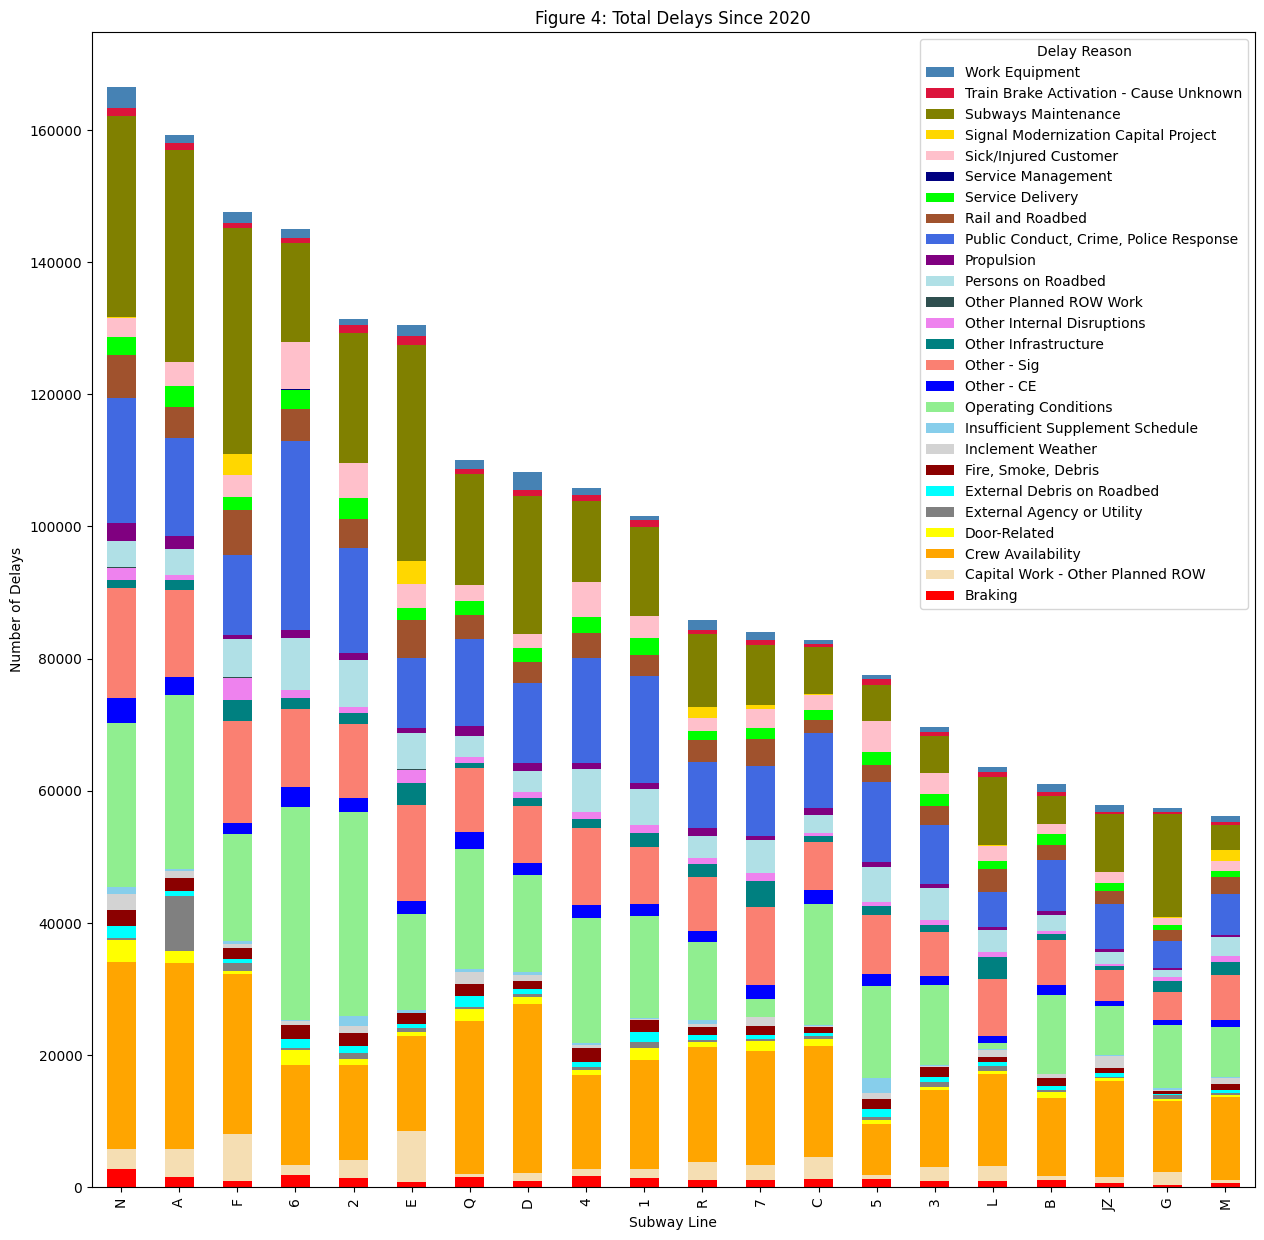

In [530]:
# Plot a stacked bargraph
fig, ax = plt.subplots(figsize=(15, 15))

line_grouped.plot(kind='bar', stacked=True, ax=ax, color=[category_colors[col] for col in line_grouped.columns])

# reverse the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="Delay Reason")

plt.title(get_figure_label() + ": Total Delays Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Subway Line")

In [531]:
# group by month
monthly_df = df.groupby(['month']).sum()

# only keep month and delays
monthly_df = monthly_df[['delays']]

monthly_df

,delays
month,
2020-01-01,36876
2020-02-01,33648
2020-03-01,21341
2020-04-01,12390
2020-05-01,9141
2020-06-01,15397
2020-07-01,21924
2020-08-01,23406
2020-09-01,22887


Text(0.5, 0, 'Date')

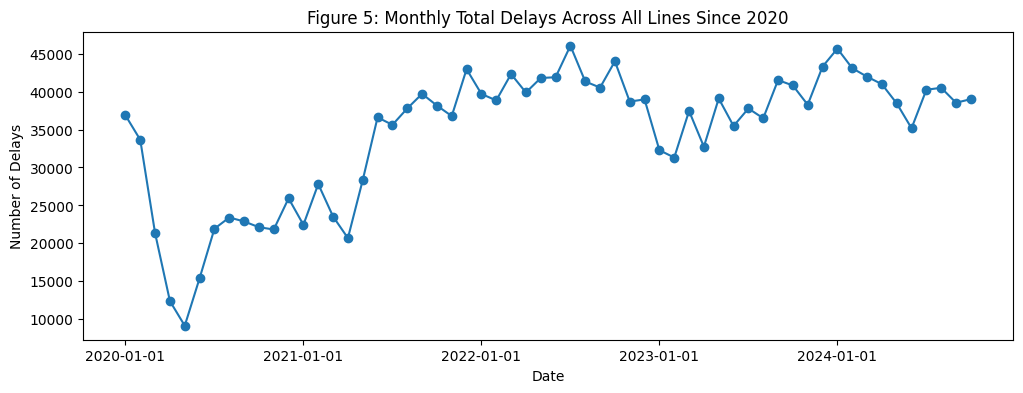

In [532]:
# plot the monthly delays
plt.figure(figsize=(12, 4))
plt.plot(monthly_df.index, monthly_df['delays'], marker='o')

# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(monthly_df.index), 12), monthly_df.index[::12])

plt.title(get_figure_label() + ": Monthly Total Delays Across All Lines Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

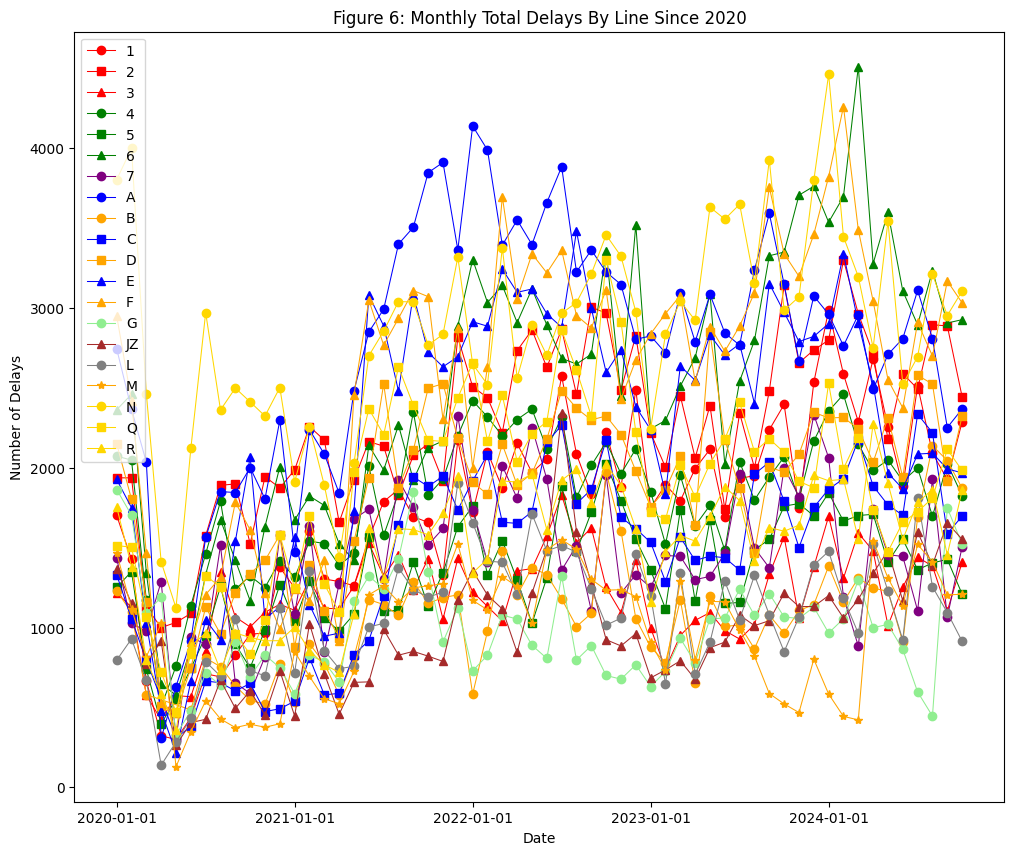

In [533]:
# plot each line's individual delays over time
plt.figure(figsize=(12, 10))

for line in df['line'].unique():
    line_df = df[df['line'] == line]
    monthly_df = line_df.groupby('month').sum()
    plt.plot(
        monthly_df.index, 
        monthly_df['delays'], 
        label=line, 
        marker=line_colors_shapes[line].shape, 
        color=line_colors_shapes[line].color,
        linewidth=0.75
    )

# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(monthly_df.index), 12), monthly_df.index[::12])

plt.legend(loc='upper left')
plt.title(get_figure_label() + ": Monthly Total Delays By Line Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")


Text(0.5, 0, 'Date')

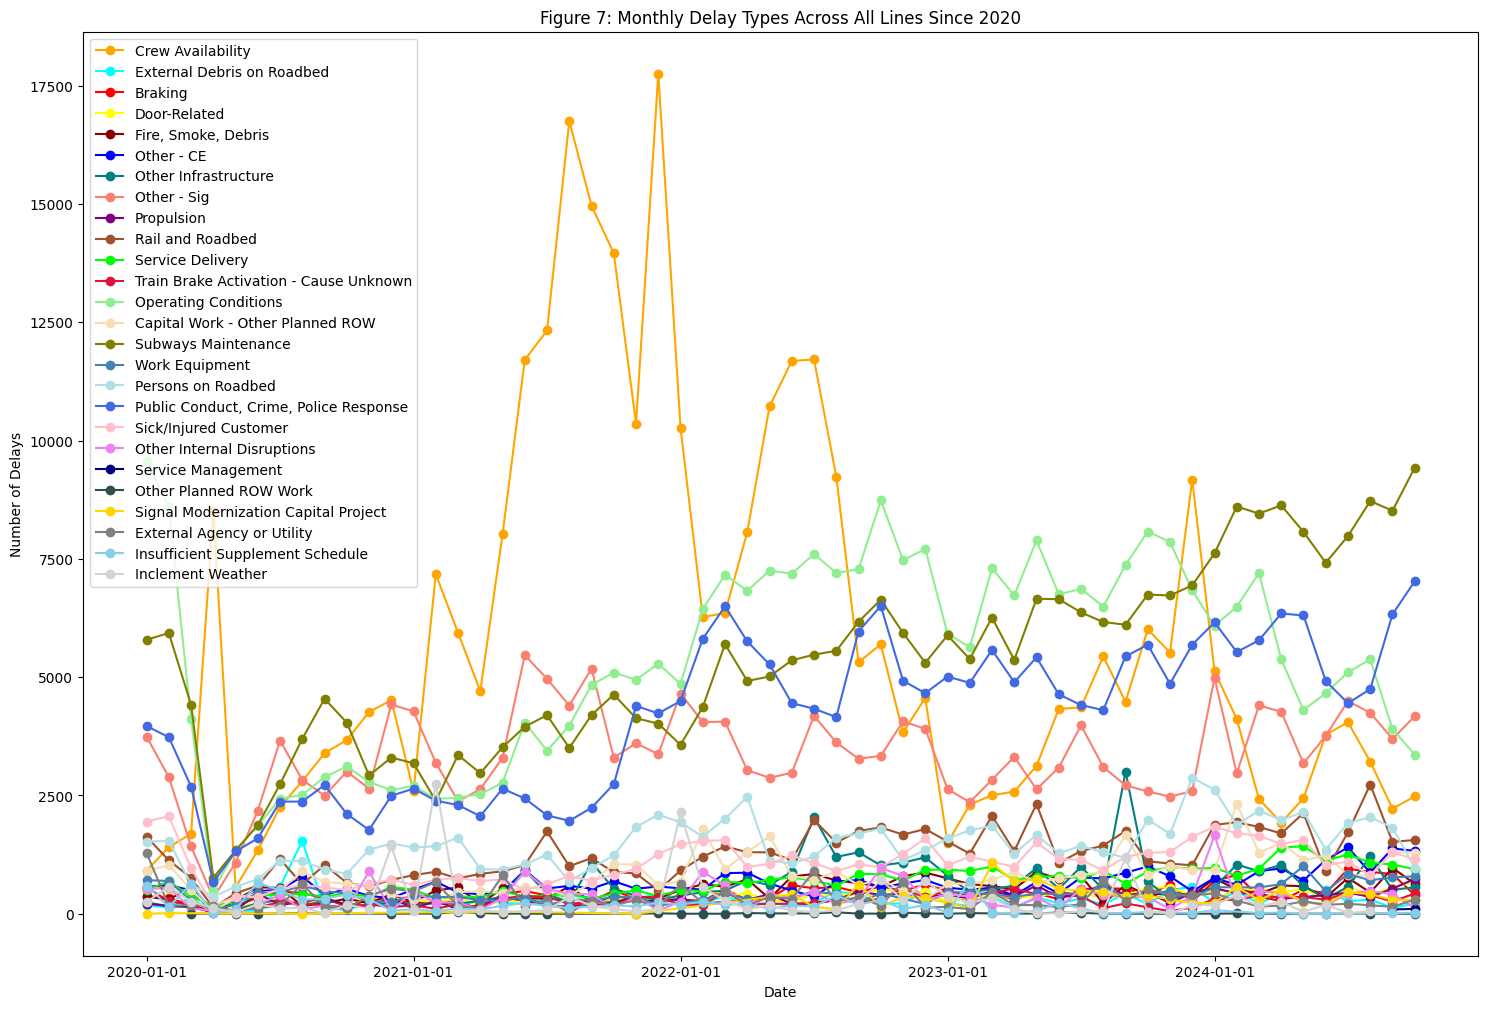

In [534]:
# plot each delay type

plt.figure(figsize=(18, 12))
for delay_type in df['subcategory'].unique():
    delay_type_df = df[df['subcategory'] == delay_type].groupby(['month']).sum()
    plt.plot(
        delay_type_df.index, 
        delay_type_df['delays'], 
        marker='o',
        label=delay_type,
        color=category_colors[delay_type],
    )



# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(monthly_df.index), 12), monthly_df.index[::12])

plt.legend()
plt.title(get_figure_label() + ": Monthly Delay Types Across All Lines Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")
